# Figures 2 and 3

In [1]:
from pathlib import Path
import time
import matplotlib.pyplot as plt
import scipy.special
import matplotlib as mpl
import pulp

from tools import write_result
from tools import computation


mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

# Parameter creation

In [2]:
"""Create necessary parameters for game 1"""
def createParameters(n, m):
    PN = [0 for i in range(0, n)]
    loss_failure = [[0 for i in range(0, n)] for i in range(0, m)]
    gain_success = [[0 for i in range(0, n)] for i in range(0, m)]
    theta = 0.2

    for i in range(0, n):
        PN[i] = scipy.special.binom(
            n - 1, i) * theta**i * (1 - theta)**(n - 1 - i)

    # Create the functions of the different attackers
    for i in range(0, n):
        gain_success[0][i] = i
        loss_failure[0][i] = 30 * (i // 10)
        if(m > 1):
            gain_success[1][i] = n - 1 - i
            loss_failure[1][i] = 300 - 30 * (i // 10)
    return PN, gain_success, loss_failure


# Parameters common to both experiments
n = 101
p = 0.2
CFA = [140 for i in range(n)]

# First experiment with a single attacker

In [3]:
m = 1
PN, gain_success, loss_failure = createParameters(n, m)
proba_attack = [1]

# Solves the linear program and retrieves the strategy of the defender and on the attacker
defender_solution = computation.solve_defender(
    p, n, m, loss_failure, gain_success, PN, CFA, proba_attack)
end = time.time()
Geql = computation.retrieve_gain_eql(defender_solution, m)
pi = computation.give_probability(Geql, loss_failure, gain_success)

attacker_solution = computation.solve_attacker(
    Geql, loss_failure, gain_success, pi, p, proba_attack, CFA, PN)
alpha = computation.retrieve_attacker_strat(attacker_solution, n, m)

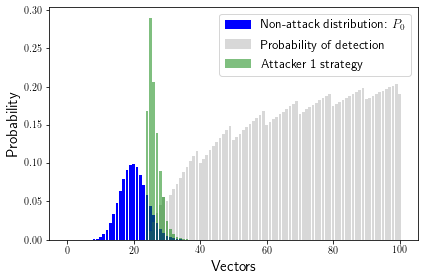

In [4]:
# Plot of the BNE
fig_one, ax_one = plt.subplots()
non_user = ax_one.bar(range(n), PN, color='b',
                      label=r'Non-attack distribution: $P_0$')
defender_strat = ax_one.bar(
    range(n), pi, color='grey', alpha=0.3, label=r'Probability of detection')
attacker_strat = ax_one.bar(
    range(n), alpha[0], color='g', alpha=0.5, label=r'Attacker 1 strategy')
ax_one.set_ylabel('Probability', fontsize=15)
ax_one.set_xlabel('Vectors', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('plots/plot_1_attacker', dpi=400)



# Second experiment: equally likely attackers

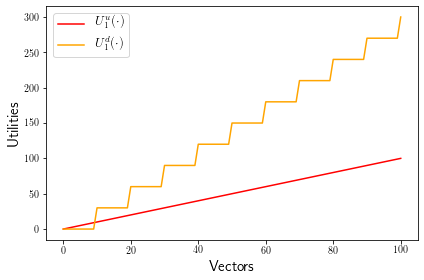

In [5]:
# Second experiment: we add another attacker with equal probability of presence
m = 2
proba_attack = [0.5, 0.5]
PN, gain_success, loss_failure = createParameters(n, m)

# Solves the linear program and retrieves the strategy of the defender and on the attacker
defender_solution = computation.solve_defender(
    p, n, m, loss_failure, gain_success, PN, CFA, proba_attack)
Geql = computation.retrieve_gain_eql(defender_solution, m)
pi = computation.give_probability(Geql, loss_failure, gain_success)

attacker_solution = computation.solve_attacker(
    Geql, loss_failure, gain_success, pi, p, proba_attack, CFA, PN)
alpha = computation.retrieve_attacker_strat(attacker_solution, n, m)

# Plot of the parameters of the problem
fig_parameters, ax_parameters = plt.subplots()
ax_parameters.plot(
    range(n), gain_success[0], label=r'$U_1^u(\cdot)$', color='r')
ax_parameters.plot(
    range(n), loss_failure[0], label=r'$U_1^d(\cdot)$', color='orange')
ax_parameters.set_xlabel('Vectors', fontsize=15)
ax_parameters.set_ylabel('Utilities', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('plots/plot_parameters', dpi=400)

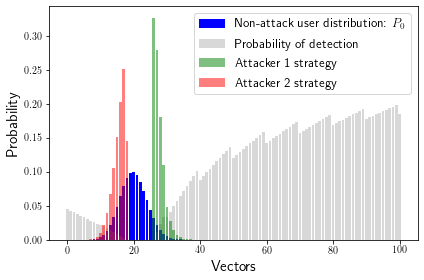

In [6]:
# Plot of the BNE
fig_equal, ax_equal = plt.subplots()
non_user = ax_equal.bar(range(n), PN, color='b',
                        label=r'Non-attack user distribution: $P_0$')
defender_strat = ax_equal.bar(
    range(n), pi, color='grey', alpha=0.3, label=r'Probability of detection')
attacker_strat_1 = ax_equal.bar(
    range(n), alpha[0], color='g', alpha=0.5, label=r'Attacker 1 strategy')
attacker_strat_2 = ax_equal.bar(
    range(n), alpha[1], color='r', alpha=0.5, label=r'Attacker 2 strategy')
ax_equal.set_ylabel('Probability', fontsize=15)
ax_equal.set_xlabel('Vectors', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('plots/plot_2_equally_likely', dpi=400)

# Third experiment: attacker 1 is more likely

In [7]:
m = 2
proba_attack = [0.95, 0.05]
PN, gain_success, loss_failure = createParameters(n, m)

# Solves the linear program and retrieves the strategy of the defender and on the attacker
defender_solution = computation.solve_defender(
    p, n, m, loss_failure, gain_success, PN, CFA, proba_attack)
Geql = computation.retrieve_gain_eql(defender_solution, m)
pi = computation.give_probability(Geql, loss_failure, gain_success)

attacker_solution = computation.solve_attacker(
    Geql, loss_failure, gain_success, pi, p, proba_attack, CFA, PN)
alpha = computation.retrieve_attacker_strat(attacker_solution, n, m)

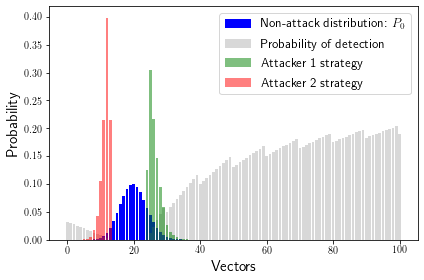

In [8]:
# Plot of the BNE
fig_one_more, ax_one_more = plt.subplots()
non_user = ax_one_more.bar(range(n), PN, color='b',
                           label=r'Non-attack distribution: $P_0$')
defender_strat = ax_one_more.bar(
    range(n), pi, color='grey', alpha=0.3, label=r'Probability of detection')
attacker_strat_1 = ax_one_more.bar(
    range(n), alpha[0], color='g', alpha=0.5, label=r'Attacker 1 strategy')
attacker_strat_2 = ax_one_more.bar(
    range(n), alpha[1], color='r', alpha=0.5, label=r'Attacker 2 strategy')
ax_one_more.set_ylabel('Probability', fontsize=15)
ax_one_more.set_xlabel('Vectors', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('plots/plot_1_more_likely', dpi=400)